**INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY**
 

 
**Maestría en Inteligencia Artificial**

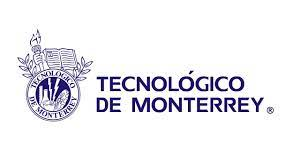

**Presenta:**
**Actividad Semanal 6**

**Tema:**
**Visualización**

**Materia:**
<!--  -->
**TC4029.10 - Ciencia y Análitica de Datos**

**Profesor Titular:**
**Dra. María de la Paz Rico Fernández**

**Alumno:**

*   **A01793625 - Luis Angel Hermenegildo Dominguez**




**noviembre de 2022**


**El nombre que caracteriza el conjunto de datos:**

The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients


**URL DE LOS DATOS**

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv

https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt
 (Yeh, 2009)

In [81]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA



1. Descarga los datos Enlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [7]:
#HP: Historial de Pago (History of past payment)
#EC: Estado de cuenta(Amount of bill statement)
#PA: Pagos Anteriores(Amount of previous payment)
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.rename(columns = {'X1' : 'Monto_credito', 'X2': 'Genero','X3':'Educacion','X4':'Estado_civil','X5':'Edad','X6':'HP_Sep','X7':'HP_Ago','X8':'HP_Jul','X9':'HP_Jun','X10':'HP_May','X11':'HP_Abr','X12':'EC_Sep','X13':'EC_Ago','X14':'EC_Jul','X15':'EC_Jun','X16':'EC_May','X17':'EC_Abr','X18':'PA_Sep','X19':'PA_Ago','X20':'PA_Jul','X21':'PA_Jun','X22':'PA_May','X23':'PA_Abr','Y':'Aprobado'}, inplace = True)

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
df.shape

(30000, 24)

In [6]:
df.columns

Index(['Monto_credito', 'Genero', 'Educacion', 'Estado_civil', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr', 'Aprobado'],
      dtype='object')

In [8]:
df.head()

,Monto_credito,Genero,Educacion,Estado_civil,Edad,HP_Sep,HP_Ago,HP_Jul,HP_Jun,HP_May,...,EC_Jun,EC_May,EC_Abr,PA_Sep,PA_Ago,PA_Jul,PA_Jun,PA_May,PA_Abr,Aprobado
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [9]:
df.dtypes

Monto_credito      int64
Genero           float64
Educacion        float64
Estado_civil     float64
Edad             float64
HP_Sep           float64
HP_Ago           float64
HP_Jul           float64
HP_Jun           float64
HP_May           float64
HP_Abr           float64
EC_Sep           float64
EC_Ago           float64
EC_Jul           float64
EC_Jun           float64
EC_May           float64
EC_Abr           float64
PA_Sep           float64
PA_Ago           float64
PA_Jul           float64
PA_Jun           float64
PA_May           float64
PA_Abr           float64
Aprobado         float64
dtype: object

In [10]:
df.info

<bound method DataFrame.info of        Monto_credito  Genero  Educacion  Estado_civil  Edad  HP_Sep  HP_Ago  \
ID                                                                            
1              20000     2.0        2.0           1.0  24.0     2.0     2.0   
2             120000     2.0        2.0           2.0  26.0    -1.0     2.0   
3              90000     2.0        2.0           2.0  34.0     0.0     0.0   
4              50000     2.0        2.0           1.0  37.0     0.0     0.0   
5              50000     1.0        2.0           1.0  57.0    -1.0     0.0   
...              ...     ...        ...           ...   ...     ...     ...   
29996         220000     1.0        3.0           1.0  39.0     0.0     0.0   
29997         150000     1.0        3.0           2.0  43.0    -1.0    -1.0   
29998          30000     1.0        2.0           2.0  37.0     4.0     3.0   
29999          80000     1.0        3.0           1.0  41.0     1.0    -1.0   
30000          50000

In [122]:
df.isnull().values.any()

True

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [265]:
#Identificar las variables categoricas de las numericas
categorical_features = ['Genero','Educacion','Estado_civil']
numeric_features = ['Monto_credito', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr', 'Aprobado']

In [162]:
#Se definen pipelines para realizar la transformación de los datos y rellenar los datos nulos
#num_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),('minmax',StandardScaler())])
num_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median'))])
#cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])


# Se integran los pipelines anteriores y se especifica que las columnas no declaradas en categorical_featues y numeric_features también se conserven
columnasTransformer = ColumnTransformer(
    transformers = [
        ('categorical_data_pre', cat_pipeline, categorical_features),
        ('numeric_data_pre', num_pipeline, numeric_features)
    ],
    remainder=SimpleImputer(strategy="most_frequent")
)


In [163]:
columnasTransformer

ColumnTransformer(remainder=SimpleImputer(strategy='most_frequent'),
                  transformers=[('categorical_data_pre',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Genero', 'Educacion', 'Estado_civil']),
                                ('numeric_data_pre',
                                 Pipeline(steps=[('impMean',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Monto_credito', 'HP_Sep', 'HP_Ago', 'HP_Jul',
                                  'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
                                  'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May',
                                  'EC_Abr', 'PA_Sep', 'PA_Ago', 'PA_Jul',
                                  'PA_Jun', 'PA_May', 'PA_Abr'])])

In [169]:
#pipeline = Pipeline(steps=[('ct',columnTransfomer), ('m',LinearRegression()])

t_df = columnasTransformer.fit_transform(df)
df = pd.DataFrame(t_df, columns=df.columns)
df.head(10)

,Monto_credito,Genero,Educacion,Estado_civil,Edad,HP_Sep,HP_Ago,HP_Jul,HP_Jun,HP_May,...,EC_Jun,EC_May,EC_Abr,PA_Sep,PA_Ago,PA_Jul,PA_Jun,PA_May,PA_Abr,Aprobado
0,2.0,2.0,1.0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,24.0,1.0
1,2.0,2.0,2.0,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,26.0,1.0
2,2.0,2.0,2.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,34.0,0.0
3,2.0,2.0,1.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,37.0,0.0
4,1.0,2.0,1.0,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,57.0,0.0
5,1.0,1.0,2.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,37.0,0.0
6,1.0,1.0,2.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,29.0,0.0
7,2.0,2.0,2.0,100000.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,23.0,0.0
8,2.0,3.0,1.0,140000.0,0.0,0.0,2.0,0.0,0.0,0.0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,28.0,0.0
9,1.0,3.0,2.0,20000.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,35.0,0.0


In [171]:
df.isnull().values.any()

#Sin valores nulos

False

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [65]:
categorical_features

['Genero', 'Educacion', 'Estado_civil']

In [66]:
numeric_features

['Monto_credito',
 'HP_Sep',
 'HP_Ago',
 'HP_Jul',
 'HP_Jun',
 'HP_May',
 'HP_Abr',
 'EC_Sep',
 'EC_Ago',
 'EC_Jul',
 'EC_Jun',
 'EC_May',
 'EC_Abr',
 'PA_Sep',
 'PA_Ago',
 'PA_Jul',
 'PA_Jun',
 'PA_May',
 'PA_Abr']

In [60]:
#Describir las variables categoricas
df[categorical_features].describe()

#Count: Cuenta el numero de registros
#Mean: Calcula el promedio de los datos
#Std: Calcula la desviación estandar
#min: Valor mínimo
#max: Valor máximo
#Por otra parte en lo que respecta al 25%, 50% y 75% 
#miden el grado de dispersión de los valores de la variable.


,Genero,Educacion,Estado_civil
count,29999.000000,29998.000000,29998.000000
mean,1.603753,1.853057,1.551903
std,0.489125,0.790320,0.521968
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [61]:
#Describir las variables categoricas
df[numeric_features].describe()

#Count: Cuenta el numero de registros
#Mean: Calcula el promedio de los datos
#Std: Calcula la desviación estandar
#min: Valor mínimo
#max: Valor máximo
#Por otra parte en lo que respecta al 25%, 50% y 75% 
#miden el grado de dispersión de los valores de la variable.

,Monto_credito,HP_Sep,HP_Ago,HP_Jul,HP_Jun,HP_May,HP_Abr,EC_Sep,EC_Ago,EC_Jul,EC_Jun,EC_May,EC_Abr,PA_Sep,PA_Ago,PA_Jul,PA_Jun,PA_May,PA_Abr
count,30000.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,29986.000000,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,167484.322667,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,129747.661567,1.123829,1.197254,1.196048,1.169153,1.133296,1.150134,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


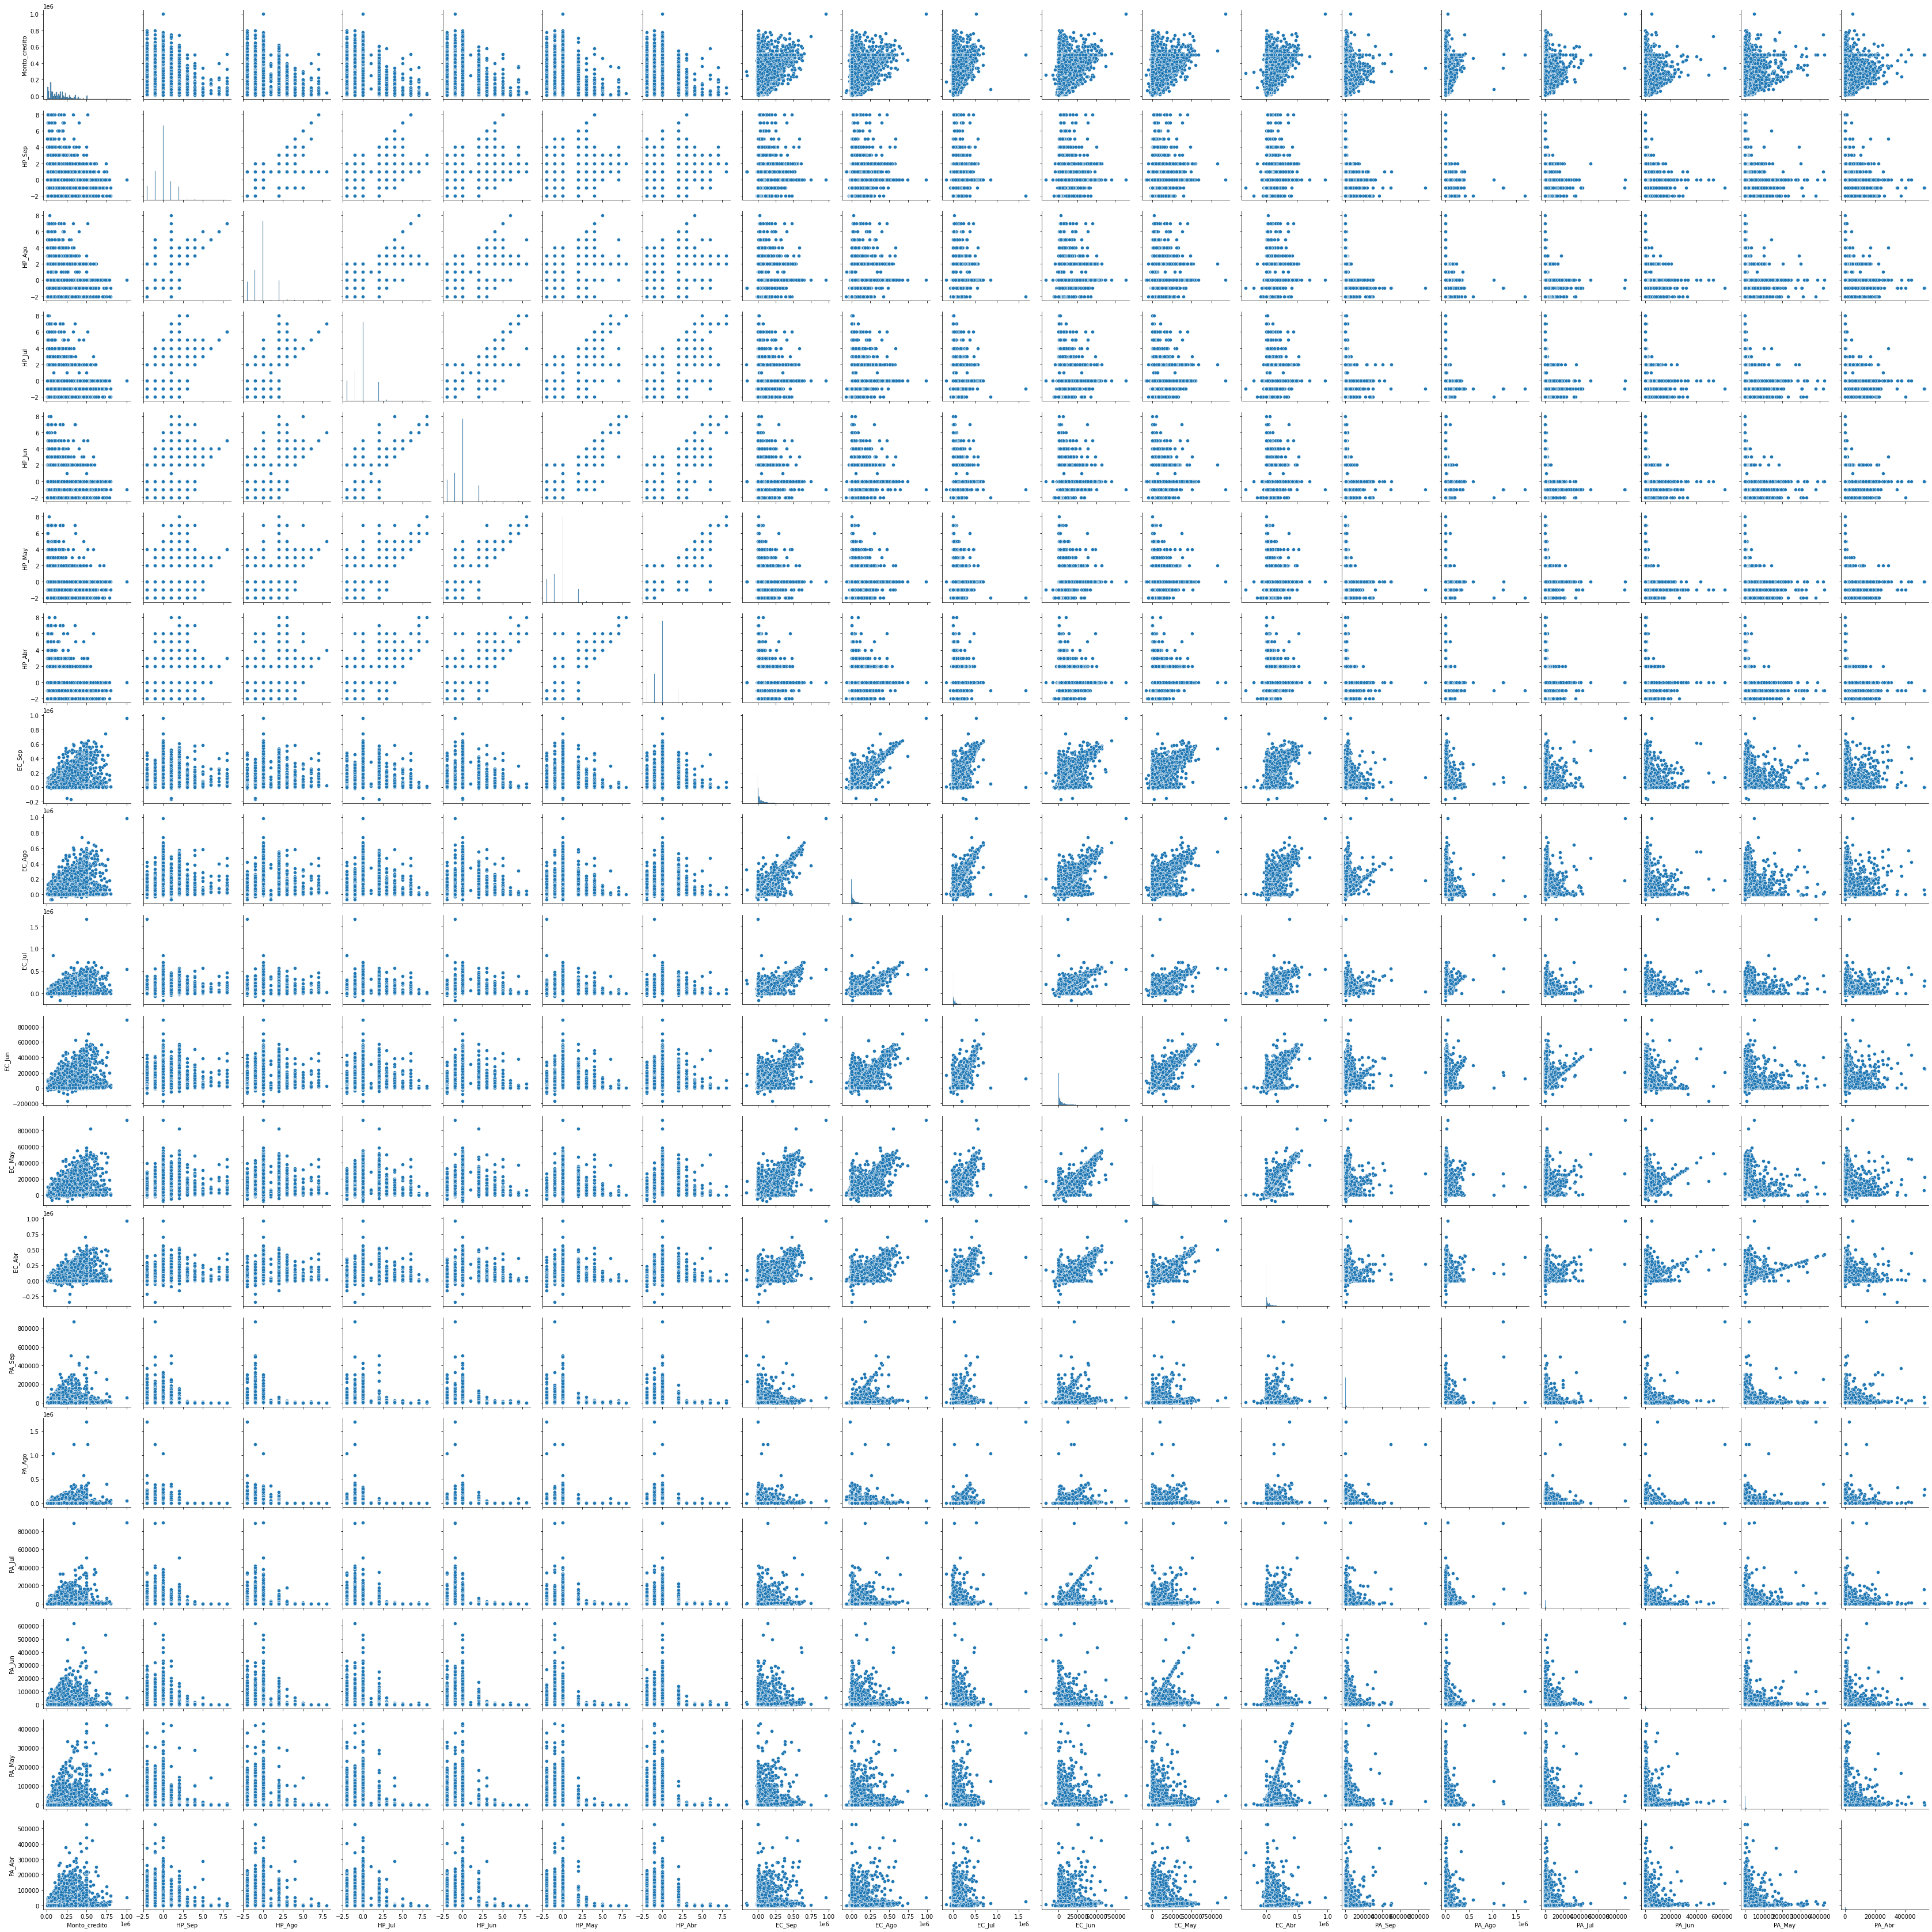

In [62]:
# Se observa la distribución y escala de los datos en los datos numericos
sns.pairplot(df[numeric_features])

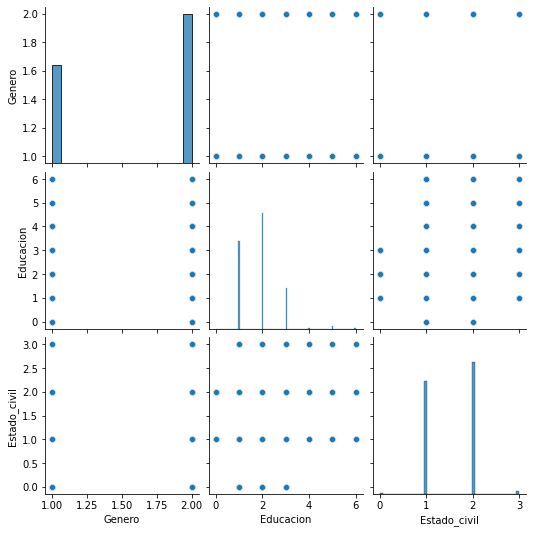

In [63]:
# Se observa la distribución y escala de los datos en los datos categoricos 
sns.pairplot(df[categorical_features])

5. Realiza el conteo de las variables categóricas

In [64]:
df[categorical_features].columns

Index(['Genero', 'Educacion', 'Estado_civil'], dtype='object')

In [53]:
df['Genero'].value_counts()

2.0    18112
1.0    11887
Name: Genero, dtype: int64

In [56]:
df['Educacion'].value_counts()

2.0    14030
1.0    10585
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: Educacion, dtype: int64

In [57]:
df['Estado_civil'].value_counts()

2.0    15964
1.0    13657
3.0      323
0.0       54
Name: Estado_civil, dtype: int64

6. Escala los datos, si consideras necesario

In [192]:
#features = df.drop(columns=['Aprobado'])
features =df.columns.drop('Aprobado')
target = ['Aprobado']

Index(['Monto_credito', 'Genero', 'Educacion', 'Estado_civil', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr'],
      dtype='object')

In [274]:
#Se definen pipelines para realizar la transformación de los datos
num_pipeline_scl = Pipeline(steps = [('minmax',StandardScaler())])
cat_pipeline_scl = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown="ignore"))])


# Se integran los pipelines anteriores y se especifica que las columnas no declaradas en categorical_featues y numeric_features también se conserven
columnasTransformer = ColumnTransformer(
    transformers = [
        ('numeric_data_scl', num_pipeline_scl, numeric_features)
    ],
    remainder='passthrough'
)


In [276]:
t_df = columnasTransformer.fit_transform(df)
ndf = pd.DataFrame(t_df)
ndf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.810104,1.794550,1.782310,-0.697081,-0.666630,-1.530284,-1.486264,-0.642559,-0.647432,-0.668013,...,-0.227093,-0.296760,-0.308063,-0.314119,-0.293390,-1.245799,1.87656,2.0,1.0,20000.0
1,0.810104,-0.875073,1.782310,0.139115,0.188828,0.234953,1.992411,-0.659277,-0.666780,-0.639274,...,-0.213595,-0.239960,-0.244229,-0.314119,-0.180886,-1.028820,1.87656,2.0,2.0,120000.0
2,0.810104,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,-0.298608,-0.493929,-0.482425,...,-0.191894,-0.239960,-0.244229,-0.248665,-0.012130,-0.160904,-0.53289,2.0,2.0,90000.0
3,0.810104,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,-0.057533,-0.013313,0.032840,...,-0.169368,-0.228600,-0.237846,-0.244149,-0.237138,0.164564,-0.53289,2.0,1.0,50000.0
4,-1.234409,-0.875073,0.111655,-0.697081,0.188828,0.234953,0.253074,-0.578674,-0.611350,-0.161199,...,1.335031,0.271233,0.266439,-0.269021,-0.255195,2.334354,-0.53289,2.0,1.0,50000.0
5,-1.234409,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,0.178912,0.110839,0.152773,...,-0.178222,-0.259442,-0.244229,-0.248665,-0.248389,0.164564,-0.53289,1.0,2.0,50000.0
6,-1.234409,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,4.301612,5.098168,5.739162,...,1.479082,1.861612,0.983864,0.585873,0.481200,-0.703352,-0.53289,1.0,2.0,500000.0
7,0.810104,0.014802,-0.723672,-0.697081,0.188828,0.234953,-0.616595,-0.534414,-0.685678,-0.669282,...,-0.230912,-0.296760,-0.270975,-0.203698,-0.206650,-1.354289,-0.53289,2.0,2.0,100000.0
8,0.810104,0.014802,0.111655,1.811508,0.188828,0.234953,0.253074,-0.542441,-0.492959,-0.503348,...,-0.256997,-0.272222,-0.244229,-0.248665,-0.237138,-0.811841,-0.53289,3.0,1.0,140000.0
9,-1.234409,-1.764947,-1.558999,-1.533278,-1.522089,-0.647666,-0.616595,-0.695702,-0.691017,-0.677949,...,-0.256997,-0.296760,0.522220,-0.240680,-0.293390,-0.052415,-0.53289,3.0,2.0,20000.0


In [242]:
ndf['PA_May'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: PA_May, dtype: float64

In [294]:
features_df = df.copy().drop(columns=['Aprobado'])
scaler = StandardScaler()
scaled = scaler.fit_transform(features_df)
scaled_df = pd.DataFrame(scaled, columns=features_df.columns)
scaled_df.head()


,Monto_credito,Genero,Educacion,Estado_civil,Edad,HP_Sep,HP_Ago,HP_Jul,HP_Jun,HP_May,...,EC_Jul,EC_Jun,EC_May,EC_Abr,PA_Sep,PA_Ago,PA_Jul,PA_Jun,PA_May,PA_Abr
0,0.810104,0.185925,-1.057436,-1.136720,1.794550,1.782310,-0.697081,-0.666630,-1.530284,-1.486264,...,-0.672519,-0.663090,-0.652775,-0.341871,-0.227093,-0.296760,-0.308063,-0.314119,-0.293390,-1.245799
1,0.810104,0.185925,0.858440,-0.365981,-0.875073,1.782310,0.139115,0.188828,0.234953,1.992411,...,-0.621656,-0.606259,-0.598016,-0.341871,-0.213595,-0.239960,-0.244229,-0.314119,-0.180886,-1.028820
2,0.810104,0.185925,0.858440,-0.597202,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,...,-0.449748,-0.417210,-0.391674,-0.250214,-0.191894,-0.239960,-0.244229,-0.248665,-0.012130,-0.160904
3,0.810104,0.185925,-1.057436,-0.905498,0.014802,0.111655,0.139115,0.188828,0.234953,0.253074,...,-0.232386,-0.186744,-0.156618,-0.221111,-0.169368,-0.228600,-0.237846,-0.244149,-0.237138,0.164564
4,-1.234409,0.185925,-1.057436,-0.905498,-0.875073,0.111655,-0.697081,0.188828,0.234953,0.253074,...,-0.347013,-0.348158,-0.331525,-0.221111,1.335031,0.271233,0.266439,-0.269021,-0.255195,2.334354


In [295]:
summary = {
"Varianzas": scaled_df[numerical_features].var(),
"Valor Min": scaled_df[numerical_features].min(),
"Valor Max": scaled_df[numerical_features].max()
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = numerical_features).transpose()

,HP_Sep,HP_Ago,HP_Jul,HP_Jun,HP_May,HP_Abr,EC_Sep,EC_Ago,EC_Jul,EC_Jun,EC_May,EC_Abr,PA_Sep,PA_Ago,PA_Jul,PA_Jun,PA_May,PA_Abr
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.558999,-1.533278,-1.522089,-1.530284,-1.486264,-2.944435,-1.671428,-2.945734,-3.315117,-2.000951,-6.355431,-0.341871,-0.256997,-0.296760,-0.308063,-0.314119,-0.293390,-1.571268
Valor Max,6.794274,6.828688,7.032495,7.295903,7.210422,12.403273,13.133838,23.318624,13.186916,14.587929,15.495608,52.403176,72.843140,50.597630,39.332561,27.603890,29.445147,4.721123


In [331]:
X = df.copy().drop(columns='Aprobado')
y = df['Aprobado']

In [356]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


array([[ 0.8101043 ,  0.18592545, -1.05743618, ..., -0.31411922,
        -0.29339039, -1.24579932],
       [ 0.8101043 ,  0.18592545,  0.85844046, ..., -0.31411922,
        -0.18088632, -1.02882033],
       [ 0.8101043 ,  0.18592545,  0.85844046, ..., -0.24866527,
        -0.01213022, -0.16090438],
       ...,
       [-1.23440895,  0.18592545,  0.85844046, ..., -0.18321131,
        -0.11900909,  0.1645641 ],
       [-1.23440895,  1.45129828, -1.05743618, ...,  3.15258391,
        -0.19191172,  0.59852207],
       [-1.23440895,  0.18592545, -1.05743618, ..., -0.24866527,
        -0.23713836,  1.14096954]])

7. Reduce las dimensiones con PCA, si consideras necesario.

In [347]:
# The PCA model
pca = PCA(n_components=5) # estimate only 5 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space
print("Dimensiones de X_new con PCA: ",X_new.shape)

Dimensiones de X_new con PCA:  (30000, 5)


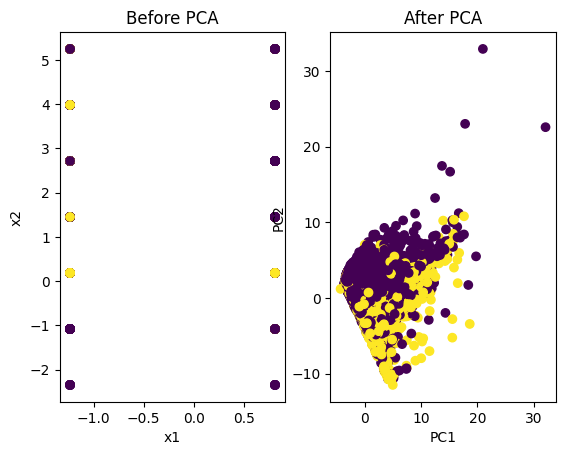

In [348]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

8. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [350]:
#Se detalla que la varianza máxima para cada PC(Componente Principal)
print(pca.explained_variance_ratio_)

[0.28446606 0.17817665 0.06743977 0.06399953 0.04456486]


In [349]:
#Se observa que estos valores (en la diagonal tenemos las varianzas) 
#son iguales a los valores propios reales de la covarianza almacenada en:
pca.explained_variance_

array([6.54293746, 4.09819948, 1.55116631, 1.47203822, 1.02502587])

9. Indica la importancia de las variables en cada componente

In [358]:
#A continuación se muestra la importancia de cada variable para cada componente
print(df.columns.drop('Aprobado'))
print(np.round(abs( pca.components_ ),3))

Index(['Monto_credito', 'Genero', 'Educacion', 'Estado_civil', 'Edad',
       'HP_Sep', 'HP_Ago', 'HP_Jul', 'HP_Jun', 'HP_May', 'HP_Abr', 'EC_Sep',
       'EC_Ago', 'EC_Jul', 'EC_Jun', 'EC_May', 'EC_Abr', 'PA_Sep', 'PA_Ago',
       'PA_Jul', 'PA_Jun', 'PA_May', 'PA_Abr'],
      dtype='object')
[[0.022 0.019 0.006 0.069 0.161 0.194 0.2   0.207 0.211 0.206 0.334 0.346
  0.35  0.354 0.352 0.345 0.094 0.079 0.086 0.078 0.075 0.07  0.014]
 [0.031 0.092 0.043 0.316 0.298 0.335 0.344 0.345 0.332 0.306 0.14  0.14
  0.146 0.145 0.144 0.142 0.149 0.14  0.152 0.141 0.137 0.129 0.067]
 [0.024 0.317 0.454 0.017 0.017 0.018 0.061 0.088 0.109 0.111 0.151 0.127
  0.084 0.07  0.057 0.048 0.282 0.302 0.28  0.237 0.194 0.209 0.462]
 [0.078 0.246 0.444 0.069 0.017 0.05  0.082 0.108 0.116 0.111 0.168 0.149
  0.105 0.101 0.089 0.084 0.281 0.311 0.278 0.236 0.177 0.208 0.463]
 [0.884 0.364 0.05  0.155 0.029 0.036 0.03  0.014 0.002 0.017 0.013 0.005
  0.03  0.022 0.022 0.011 0.095 0.109 0.035 0.012 0.055 0.05

10. Elabora los histogramas de los atributos para visualizar su distribución

In [338]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

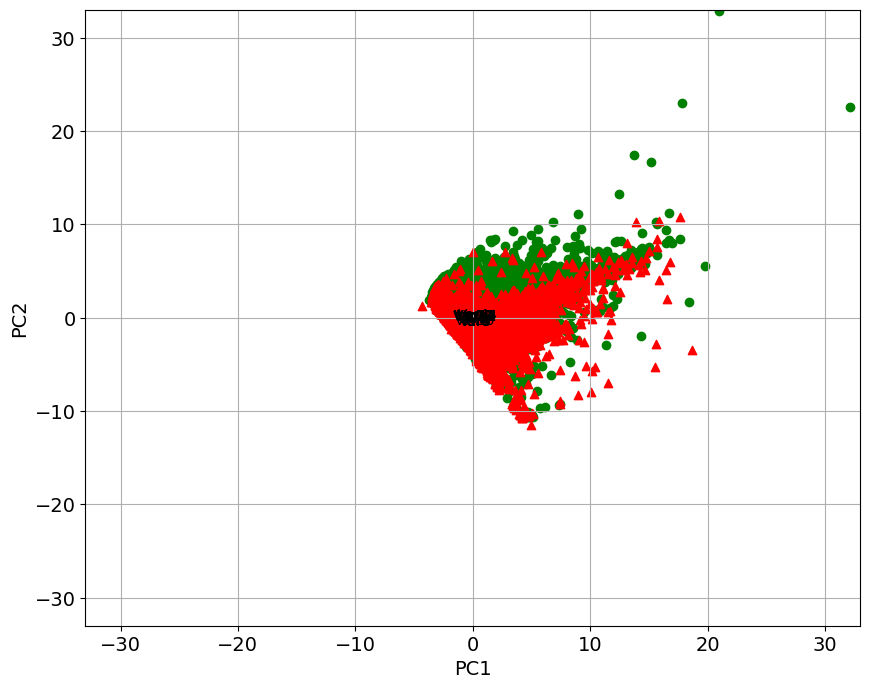

In [339]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

11. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

12. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.